In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [2]:
data_numerical

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,2,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,3,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,3,836,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,1,2,460,0,40,0,0,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,2,2,500,349,0,0,0,0,0,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,2,1,252,0,60,0,0,0,0,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,0,1,240,366,0,112,0,0,0,0


/home/ismail/miniconda3/envs/scikit-learn-course/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.18467e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/ismail/miniconda3/envs/scikit-learn-course/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.39413e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/ismail/miniconda3/envs/scikit-learn-course/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48568e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/ismail/miniconda3/envs/scikit-learn-course/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.19175e-17): result may not be accurate.
  retur

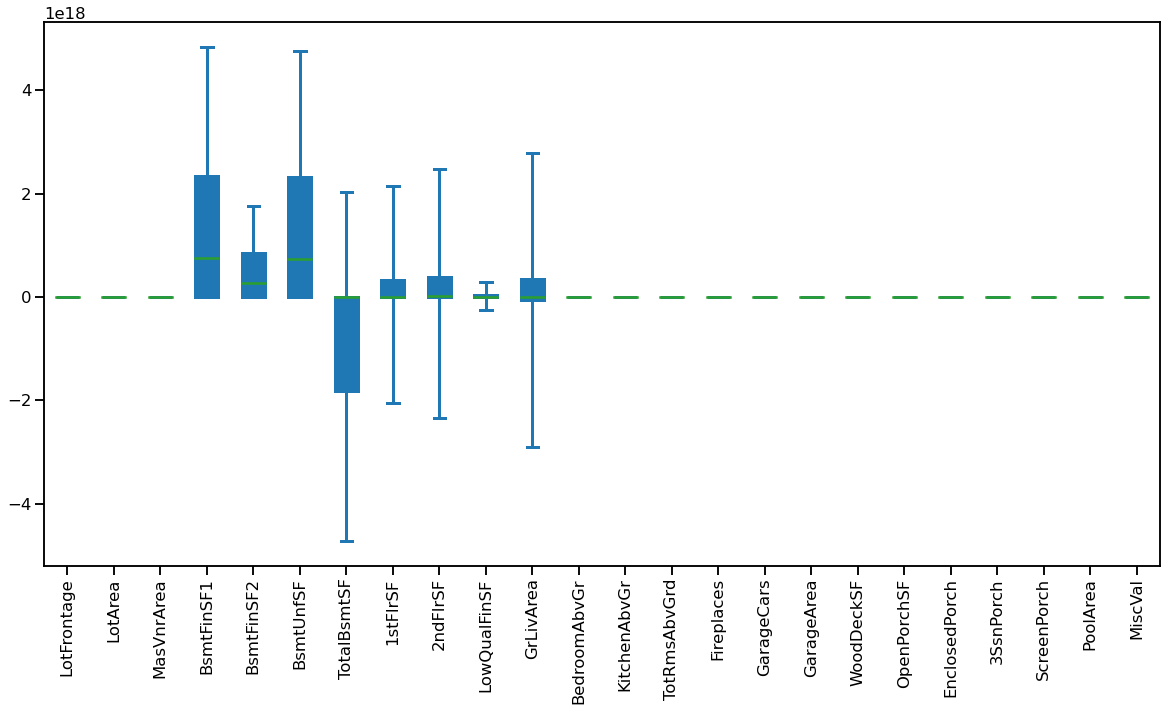

In [3]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

model = make_pipeline(StandardScaler(), Ridge(alpha=0))
cv_results= cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

df_alpha_0 = pd.DataFrame([model[-1].coef_ for model in cv_results['estimator']], columns=numerical_features).describe()
df_alpha_0.plot.box(figsize=(20,10))
_ = plt.xticks(rotation = 90)

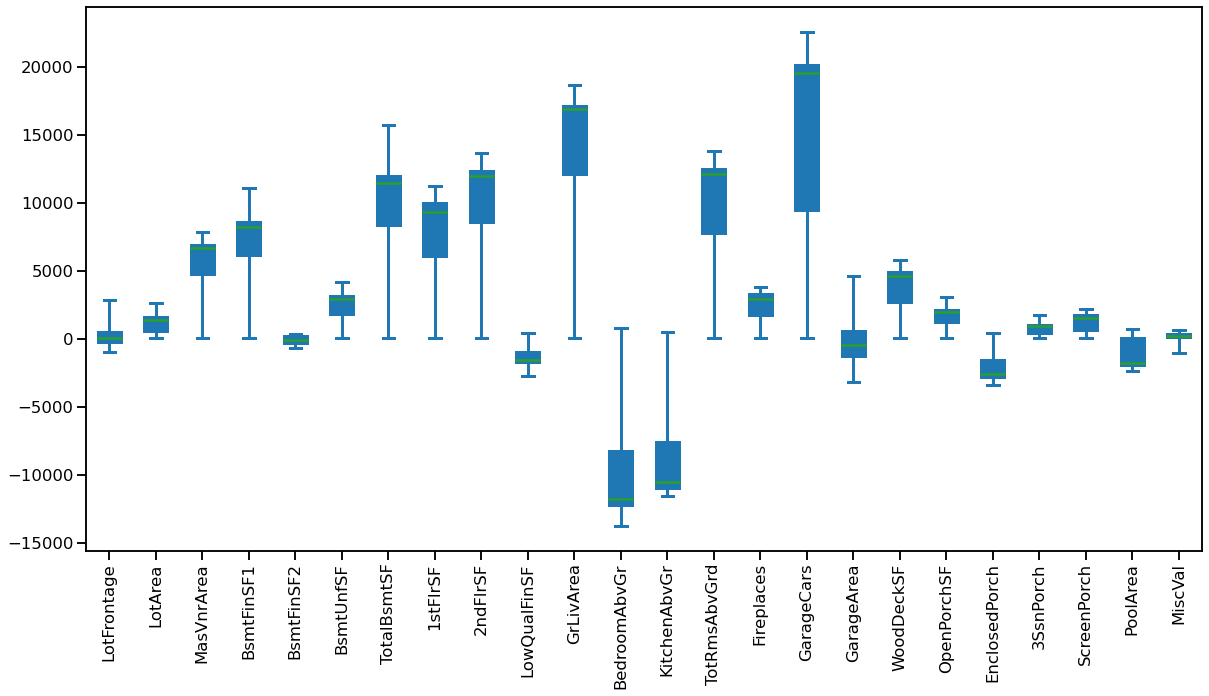

In [4]:
import matplotlib.pyplot as plt
model = make_pipeline(StandardScaler(), Ridge(alpha=1))
cv_results= cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

df_alpha_1 = pd.DataFrame([model[-1].coef_ for model in cv_results['estimator']], columns=numerical_features).describe()
df_alpha_1.plot.box(figsize=(20,10))
_ = plt.xticks(rotation = 90)

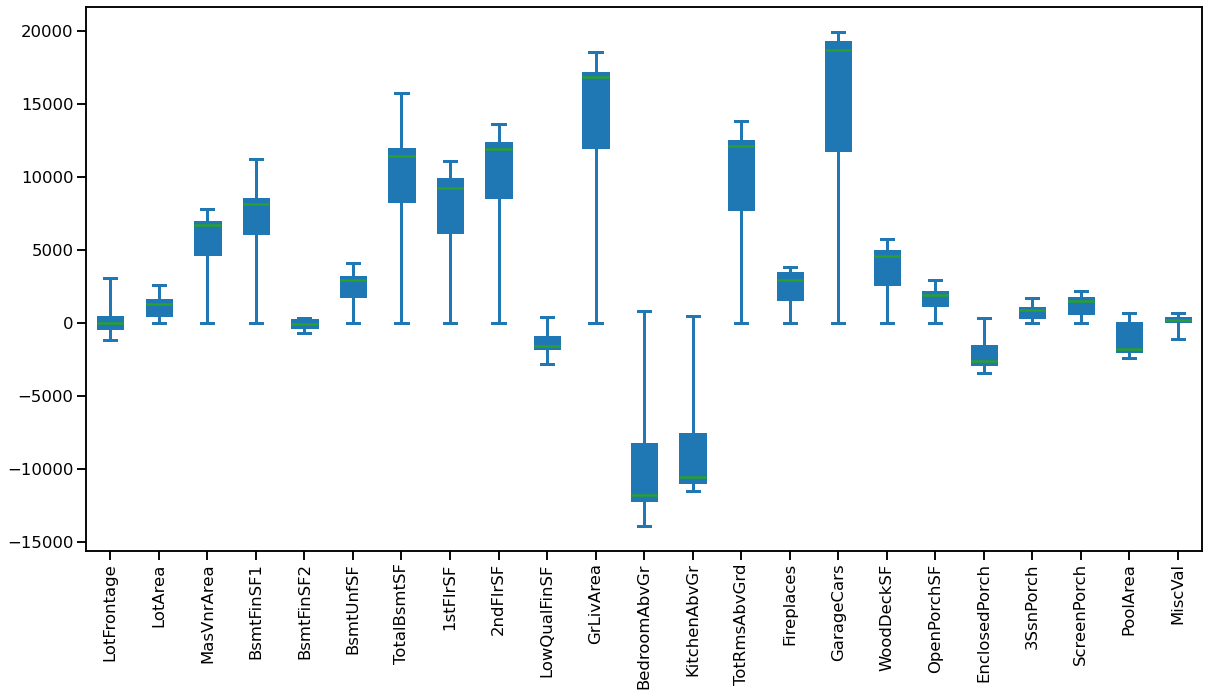

In [5]:
numerical_features.remove('GarageArea')
data_numerical = data[numerical_features]
cv_results= cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

df_no_area = pd.DataFrame([model[-1].coef_ for model in cv_results['estimator']], columns=numerical_features).describe()
df_no_area.plot.box(figsize=(20,10))
_ = plt.xticks(rotation = 90)

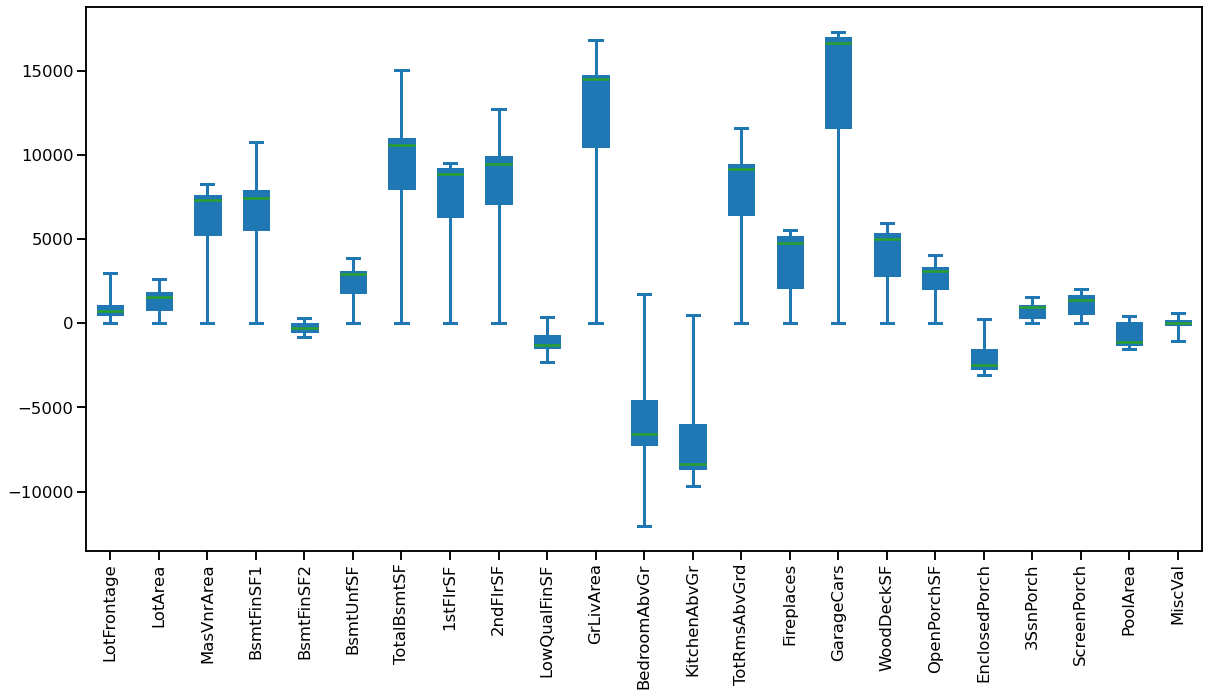

In [6]:
from sklearn.linear_model import RidgeCV
import numpy as np
alphas = np.logspace(-3,3,num=101)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results= cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

df_ridge_cv = pd.DataFrame([model[-1].coef_ for model in cv_results['estimator']], columns=numerical_features).describe()
df_ridge_cv.plot.box(figsize=(20,10))
_ = plt.xticks(rotation = 90)


Variation of alpha decreases after tuning

In [7]:
pd.DataFrame([df_ridge_cv['GarageCars'],df_alpha_1['GarageCars']]).T

,GarageCars,GarageCars
count,10.000000,10.000000
mean,16739.017299,19417.910189
std,587.547666,2895.287646
min,15359.616963,11610.344076
25%,16502.801853,19619.448536
50%,16891.618258,20080.150972
75%,17162.245664,20289.159535
max,17314.719311,22562.769198


most alphas fall between 250-400

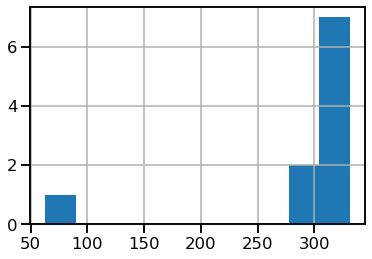

In [8]:
_ = pd.Series([model[-1].alpha_ for model in cv_results['estimator']]).hist()

In [9]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

lin_model = make_pipeline(StandardScaler(), LogisticRegression())
lin_cv_results = cross_validate(lin_model, data, target, cv=10, return_estimator=True)

dummy_model =DummyClassifier(strategy = "most_frequent")
dummy_cv_results = cross_validate(dummy_model, data, target, cv=10)

In [12]:
lin_model_wins = sum([dif>0 for dif in list(lin_cv_results['test_score'] - dummy_cv_results['test_score'])])

print(f"linear model performs better on {lin_model_wins}/10 folds ")

linear model performs better on 10/10 folds 


capital gain has highest coefficient so its the most important feature

In [13]:
pd.DataFrame([model[-1].coef_.flatten() for model in lin_cv_results['estimator']], columns = ['coef_' + col for col in data.columns])

,coef_age,coef_capital-gain,coef_capital-loss,coef_hours-per-week
0,0.522043,2.466777,0.306030,0.539635
1,0.526067,2.406533,0.308178,0.541824
2,0.524257,2.455923,0.308124,0.543843
3,0.520375,2.450482,0.309170,0.534597
4,0.519259,2.512010,0.304243,0.546715
5,0.521732,2.441632,0.304017,0.541286
6,0.520235,2.473723,0.306893,0.536374
7,0.523958,2.445321,0.308326,0.538253
8,0.516454,2.405087,0.308394,0.535121
9,0.516737,2.450489,0.301394,0.535532


In [14]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()


preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])


all_feat_model = make_pipeline(preprocessor, LogisticRegression())
all_feat_results = cross_validate(all_feat_model, data, target, cv=10, return_estimator=True)


/home/ismail/miniconda3/envs/scikit-learn-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ismail/miniconda3/envs/scikit-learn-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [16]:
all_feat_model_wins = sum([dif>0 for dif in list(all_feat_results['test_score'] - lin_cv_results['test_score'] )])

print(f"model with all features performs better on {all_feat_model_wins}/10 folds ")

model with all features performs better on 10/10 folds 


In [24]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["one-hot-encoder"]
                             .get_feature_names_out(categorical_columns)).tolist()
feature_names += numerical_columns

top coefficients

In [41]:
weights = pd.DataFrame([model[-1].coef_.flatten() for model in all_feat_results['estimator']], columns=feature_names).apply(lambda x:x.mean()).sort_values(ascending=False)
weight_std = pd.DataFrame([model[-1].coef_.flatten() for model in all_feat_results['estimator']], columns=feature_names).apply(lambda x:x.std()).sort_values(ascending=False)


In [50]:
df = pd.DataFrame([weights, weight_std]).T
df.columns = ['weight_mean', 'weight_std']
df

,weight_mean,weight_std
capital-gain,2.139843,0.660628
education_ Doctorate,1.911706,0.053392
education_ Prof-school,1.859041,0.037935
marital-status_ Married-civ-spouse,1.459783,0.049624
marital-status_ Married-AF-spouse,1.377673,0.110000
...,...,...
education_ 7th-8th,-1.324289,0.046192
education_ 1st-4th,-1.347755,0.076738
occupation_ Priv-house-serv,-1.364261,0.122838
education_ Preschool,-1.455409,0.121850


In [62]:
df_reg = pd.DataFrame()
for c in [0.001,10000,1000000]:
    model = make_pipeline(preprocessor, LogisticRegression(C=c, max_iter=5000))
    cv_results = cross_validate(model, data, target, cv=10, return_estimator=True)
    weights = pd.DataFrame([model[-1].coef_.flatten() for model in cv_results['estimator']], columns=feature_names).apply(lambda x:x.mean()).sort_values(ascending=False)
    weight_std = pd.DataFrame([model[-1].coef_.flatten() for model in cv_results['estimator']], columns=feature_names).apply(lambda x:x.std()).sort_values(ascending=False)
    df = pd.DataFrame([weights, weight_std]).T
    df.columns = ['weight_mean_'+str(c), 'weight_std_'+str(c)]
    df_reg = df_reg.join(df, how='outer')

variance for the coefficients is reduced when the model is highly regularised (C = 0.001)

In [66]:
df_reg[[col for col in df_reg.columns if 'std' in col]].mean()

weight_std_0.001      0.007499
weight_std_10000      0.213751
weight_std_1000000    0.199573
dtype: float64